<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/Central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pylab as pl
import numpy as np
import scipy as sp
#from scipy.optimize import curve.fit, minimize #per minimizzazione
import seaborn #per stile plot
seaborn.set_style("darkgrid")

In [2]:
np.random.seed(111)
mymean = 100

In [3]:
#facciamo con una chi square distribution che ha df = mean
df = mymean

In [4]:
#creiamo un dizionario mi riferisco a dei valori per nome e non per posizione
#inizio creandolo vuoto
mydist = {}

Text(0.5, 0, 'x')

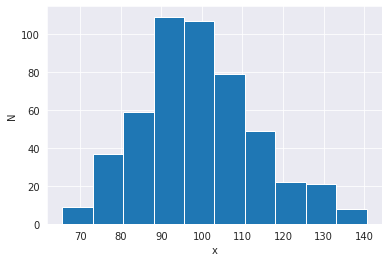

In [5]:
#le distribuzioni ci sono sia in scipy che in numpy
pl.hist(np.random.chisquare(mymean,size=500)) #hist ci dà anche un return value con l'istogramma
pl.ylabel("N")
pl.xlabel("x")

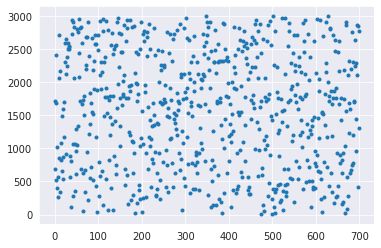

In [6]:
#scegliamo 100 size fra 10 e 2000 (qui facciamo da 0, correggere)
mysize = (np.random.rand(700)*3000).astype(int) #sarebbero continui li voglio int perché sono size
mysize[mysize<10]=10
pl.plot(mysize,'.');

In [7]:
for s in mysize:
  mydist[s] = np.random.chisquare(mymean,size=s) #così ho tutte le sample e le posso chiamare per nome

Text(0, 0.5, 'sample mean')

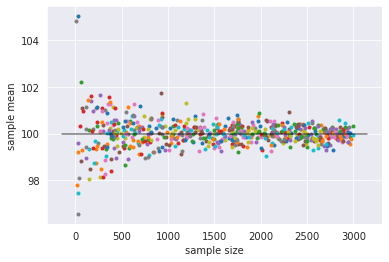

In [8]:
ax=pl.figure().add_subplot(111)
for d in mydist.keys(): #questo fa correre sui numeri del dizionario
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(), [100,100], 'k', alpha = 0.5) #do le y iniz e fin di una linea
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")

#trovo una gaussiana con media mymean e varianza che è la varianza/sqrt(N)
#i singoli punti si allontanano di più a taglia piccola perché anche qui la varianza va con 1/sqrt(N)

#sarebbe più utile mettere più punti vicino allo zero
#poi provare altre distribuzioni

#eventualmente fare fit